In [29]:
# import libraries
import numpy as np
from keras.preprocessing.image import img_to_array
from keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.models import Model
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.layers import Flatten
from keras.utils import to_categorical
from PIL import Image
from keras.preprocessing import image
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img, ImageDataGenerator

### Task 2: Load the VGG 16 model in your notebook and print the summary of the model.
#### a.	Load an image from file and pre-process it to prepare it to be applied to the model.



In [2]:
# Load the VGG16 model
model = VGG16(weights='imagenet', include_top=True)

In [3]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [6]:
image_path = r"F:\New_Laptop_Documents\NMIMS_College_Docs\3rd_Year\1st_Semester\DL\Practicals\Lab9\Nitro_Wallpaper_5000x2813.jpg"
image = load_img(image_path, target_size=(224, 224))
image = img_to_array(image)
image = preprocess_input(image)

#### b.	Predict the class of the image using VGG 16

In [7]:
predictions = model.predict(image.reshape(1, 224, 224, 3))
decoded_predictions = decode_predictions(predictions, top=5)[0]

1/1 [==============================] - 0s 335ms/step


In [8]:
for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print(f"{i + 1}: {label} ({score:.2f})")

1: sea_urchin (0.70)
2: sea_anemone (0.08)
3: theater_curtain (0.05)
4: lionfish (0.01)
5: daisy (0.01)


### Task 3: Load a few images in your notebook and predict the class of the image using the pre- trained model

In [9]:
# Step 3: Load a few images and predict their classes
image_paths = ['Image_1.jpg', 'Image_2.jpg', 'Gaussian.jpeg', 'Salt_Pepper.jpg']

for image_path in image_paths:
    # Load an image from file
    image = load_img(image_path, target_size=(224, 224))
    image = img_to_array(image)
    image = preprocess_input(image)

    # Predict the class of the image using VGG16
    predictions = model.predict(image.reshape(1, 224, 224, 3))
    decoded_predictions = decode_predictions(predictions, top=5)[0]

    print(f"Predictions for {image_path}:")
    for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
        print(f"{i + 1}: {label} ({score:.2f})")


1/1 [==============================] - 0s 109ms/step
Predictions for Image_1.jpg:
1: alp (0.78)
2: geyser (0.15)
3: volcano (0.03)
4: valley (0.02)
5: cliff (0.02)
1/1 [==============================] - 0s 119ms/step
Predictions for Image_2.jpg:
1: groom (0.15)
2: suit (0.11)
3: bookcase (0.11)
4: wardrobe (0.08)
5: sliding_door (0.05)
1/1 [==============================] - 0s 123ms/step
Predictions for Gaussian.jpeg:
1: shovel (0.08)
2: bucket (0.07)
3: great_white_shark (0.07)
4: ashcan (0.07)
5: mask (0.03)
1/1 [==============================] - 0s 115ms/step
Predictions for Salt_Pepper.jpg:
1: book_jacket (0.90)
2: comic_book (0.03)
3: web_site (0.02)
4: envelope (0.00)
5: scuba_diver (0.00)


### Task 4: Explore how to remove the last layer of the VGG model.

In [10]:
model_without_last_layer = Model(inputs=model.input, outputs=model.layers[-2].output)
model_without_last_layer.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

### Task 5: Add a few layers to the VGG 16 model.

In [11]:
# Define the number of classes (2 for binary classification)
num_classes = 2

custom_top_layer = Dense(256, activation='relu')(model_without_last_layer.output)
custom_top_layer = Dropout(0.5)(custom_top_layer)
output_layer = Dense(num_classes, activation='softmax')(custom_top_layer)

new_model = Model(inputs=model_without_last_layer.input, outputs=output_layer)
new_model.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

### Task 6: Add binary classification data and compile the model.

In [12]:
new_model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

### Task 7 and 8: Train the new model for binary classification of images. Further Predict for a random image.

In [13]:
def predict(img1):
  plt.imshow(img1)
  x = image.img_to_array(img1)
  x = np.expand_dims(x,axis=0)
  x - preprocess_input(x)
  img_class = model.predict(x)

  predict_class = decode_predictions(img_class)
  print(predict_class)

In [26]:
img_path1 = "Image_1.jpg"

img1 = image.load_img(img_path1, target_size = (224,224))

img_path2 = 'Image_2.jpg'

img2 = image.load_img(img_path2, target_size = (224,224))

img_path3 = 'Gaussian.jpeg'

img3 = image.load_img(img_path3, target_size = (224,224))

img_path4 = 'Salt_Pepper.jpeg'

img4 = image.load_img(img_path3, target_size = (224,224))

In [27]:
data = []
data.append(np.array(img1))
data.append(np.array(img2))
data.append(np.array(img3))
data.append(np.array(img4))
data = np.array(data)

In [30]:
data

array([[[[ 51,  52,  54],
         [ 52,  53,  55],
         [ 52,  53,  55],
         ...,
         [118, 101,  73],
         [110,  94,  71],
         [ 96,  84,  70]],

        [[ 50,  51,  53],
         [ 51,  52,  54],
         [ 51,  52,  54],
         ...,
         [121, 101,  74],
         [112,  94,  72],
         [ 97,  85,  69]],

        [[ 50,  51,  53],
         [ 51,  52,  54],
         [ 51,  52,  54],
         ...,
         [123, 104,  74],
         [116,  98,  74],
         [100,  87,  71]],

        ...,

        [[ 13,  13,  11],
         [ 10,  12,  11],
         [ 13,  15,  14],
         ...,
         [ 15,  16,  18],
         [ 17,  18,  20],
         [ 14,  18,  21]],

        [[  8,   8,   8],
         [ 17,  17,  19],
         [  8,   8,   8],
         ...,
         [  8,  12,  15],
         [ 14,  18,  21],
         [ 26,  30,  33]],

        [[ 16,  16,  16],
         [ 13,  13,  15],
         [ 47,  47,  47],
         ...,
         [  8,  12,  15],
        

In [31]:
targets = [0, 0, 1]
targets = to_categorical(targets, num_classes=2)

image_paths = [r"F:\New_Laptop_Documents\NMIMS_College_Docs\3rd_Year\1st_Semester\DL\Practicals\Lab9\Image_1.jpg", r"F:\New_Laptop_Documents\NMIMS_College_Docs\3rd_Year\1st_Semester\DL\Practicals\Lab9\Image_2.jpg", r"F:\New_Laptop_Documents\NMIMS_College_Docs\3rd_Year\1st_Semester\DL\Practicals\Lab9\Gaussian.jpeg", r"F:\New_Laptop_Documents\NMIMS_College_Docs\3rd_Year\1st_Semester\DL\Practicals\Lab9\Salt_Pepper.jpg"]


In [32]:
model3 = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = model3.output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)
model3 = Model(inputs=model3.input, outputs=predictions)

In [33]:
model3.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [34]:
def preprocess_img(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    plt.imshow(img)
    plt.show()
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x

def predict_class(model, img_path):
    x = preprocess_img(img_path)
    prediction = model.predict(x)
    class_label = np.argmax(prediction)
    probabilities = prediction[0] * 100
    if class_label == 0:
        print(f"The image is predicted to belong to the first class with {probabilities[0]:.2f}% probability.")
    else:
        print(f"The image is predicted to belong to the second class with {probabilities[1]:.2f}% probability.")

1/1 [==============================] - 0s 128ms/step
[[('n02870880', 'bookcase', 0.19360466), ('n02883205', 'bow_tie', 0.053831667), ('n02871525', 'bookshop', 0.049464714), ('n04589890', 'window_screen', 0.048883837), ('n04005630', 'prison', 0.030654741)]]


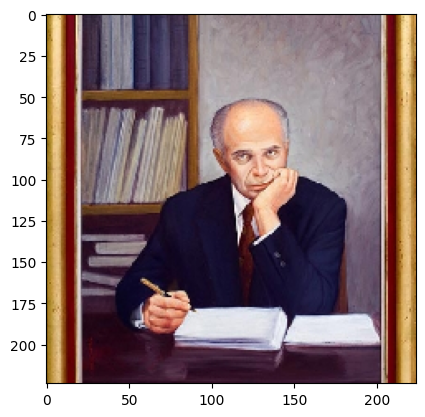

In [35]:
predict(img2)

1/1 [==============================] - 0s 113ms/step
[[('n09193705', 'alp', 0.4756926), ('n09288635', 'geyser', 0.31268018), ('n09246464', 'cliff', 0.07910416), ('n09472597', 'volcano', 0.0679643), ('n09468604', 'valley', 0.021801975)]]


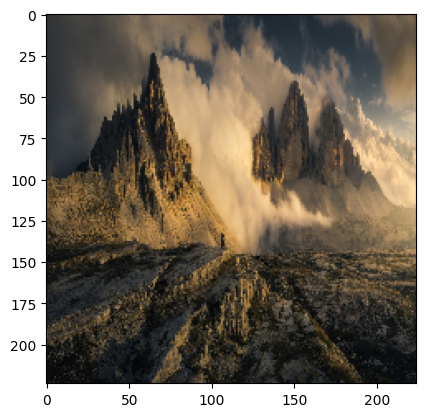

In [36]:
predict(img1)

1/1 [==============================] - 0s 113ms/step
[[('n02909870', 'bucket', 0.075282775), ('n02747177', 'ashcan', 0.06954469), ('n04208210', 'shovel', 0.06564177), ('n03388043', 'fountain', 0.034990232), ('n03724870', 'mask', 0.032282088)]]


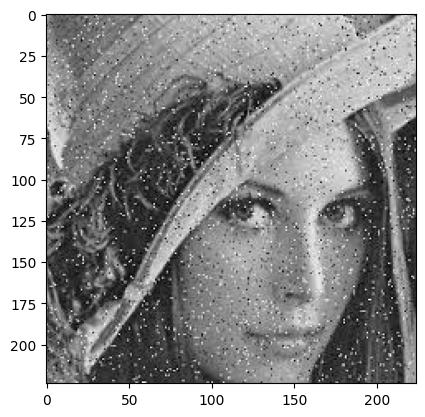

In [37]:
predict(img3)

1/1 [==============================] - 0s 117ms/step
[[('n02909870', 'bucket', 0.075282775), ('n02747177', 'ashcan', 0.06954469), ('n04208210', 'shovel', 0.06564177), ('n03388043', 'fountain', 0.034990232), ('n03724870', 'mask', 0.032282088)]]


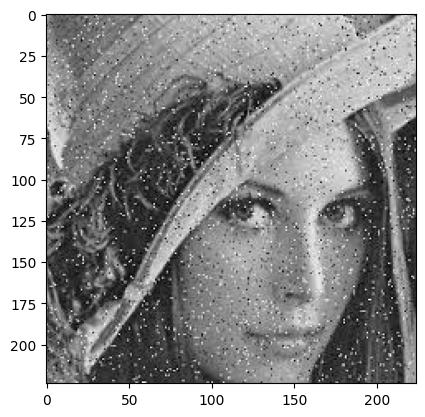

In [38]:
predict(img4)

# Experiment Conclusion

In this student experiment, we explored transfer learning using the VGG16 model for binary image classification. The key highlights are:

1. **Data Prep:** We resized and preprocessed the MNIST dataset to fit the VGG16 model's input requirements (224x224x3).

2. **Model:** We utilized VGG16, a pre-trained deep learning model, for its transfer learning capabilities.

3. **Customization:** Custom layers were added for binary classification (0 or 1), tailoring the model to our task.

4. **Training:** We trained the model on our data, adjusting labels for binary classification.

5. **Fine-Tuning:** By selectively unfreezing VGG16 layers, we fine-tuned the model for better performance.

In summary, this experiment introduced transfer learning with VGG16 as a valuable approach for students. It showcases the power of leveraging pre-trained models for efficient image classification and how fine-tuning can optimize performance. It's a strong foundation for deeper exploration in deep learning and computer vision.